In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data-2.csv', encoding='ISO-8859-1') 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Dimensions of the data

In [6]:
df.shape

(541909, 8)

## what is the data type of the cols.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Finding that there are any missing values or not..

In [14]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Finding duplicate values

In [17]:
df.duplicated().sum()

5268

## finding null values percentage


In [20]:
df.isnull().sum() * 100/len(df)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

## Imputing null values

In [23]:
# Since description is a categorical column filling it with mode
mode_value = df['Description'].mode()[0]
df['Description'].fillna(mode_value, axis = 0, inplace = True)

In [25]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [27]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
211748,555397,22147,FELTCRAFT BUTTERFLY HEARTS,3,6/2/2011 17:26,3.29,NaN,United Kingdom
183647,552666,20658,RED RETROSPOT LUGGAGE TAG,2,5/10/2011 15:05,2.46,NaN,United Kingdom
104297,545162,21497,FANCY FONTS BIRTHDAY WRAP,25,2/28/2011 13:35,0.42,16187.0,United Kingdom
345273,567158,22585,PACK OF 6 BIRDY GIFT TAGS,1,9/16/2011 17:39,1.25,16878.0,United Kingdom
65685,541696,22961,JAM MAKING SET PRINTED,1,1/20/2011 18:08,3.29,NaN,United Kingdom
249161,558888,22378,WALL TIDY RETROSPOT,1,7/4/2011 15:29,2.10,14056.0,United Kingdom
214643,555593,22729,ALARM CLOCK BAKELIKE ORANGE,4,6/6/2011 10:06,3.75,16298.0,United Kingdom
411336,572216,21327,SKULLS WRITING SET,2,10/21/2011 12:56,1.65,16015.0,United Kingdom
235642,557644,84568,GIRLS ALPHABET IRON ON PATCHES,12,6/21/2011 17:06,0.42,NaN,United Kingdom
269991,560537,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,2,7/19/2011 12:19,2.95,17779.0,United Kingdom


In [29]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Filling cutomer id 

In [32]:
mean_value = df['CustomerID'].mean()
df['CustomerID'].fillna(mean_value, axis = 0, inplace = True)

In [34]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
209384,555207,85039C,S/4 BLACK MINI ROSE CANDLE IN BOWL,12,6/1/2011 12:19,1.65,16818.00000,United Kingdom
422750,573114,20713,wrongly coded 23343,1000,10/27/2011 15:36,0.00,15287.69057,United Kingdom
68785,541875,22708,WRAP DOLLY GIRL,25,1/24/2011 10:01,0.42,16558.00000,United Kingdom
351498,567667,22174,PHOTO CUBE,2,9/21/2011 15:24,3.29,15287.69057,United Kingdom
532059,580983,84915,HAND TOWEL PINK FLOWER AND DAISY,2,12/6/2011 16:26,4.13,15287.69057,United Kingdom
462515,575978,23472,NINE DRAWER OFFICE TIDY,6,11/13/2011 13:27,12.50,15903.00000,United Kingdom
34415,539353,21156,RETROSPOT CHILDRENS APRON,8,12/17/2010 11:30,1.95,12782.00000,Portugal
47367,540412,82494L,WOODEN FRAME ANTIQUE WHITE,6,1/7/2011 10:27,2.95,13842.00000,United Kingdom
267975,560368,23154,SET OF 4 JAM JAR MAGNETS,1,7/18/2011 12:25,2.08,17841.00000,United Kingdom
166777,550953,22247,BUNNY DECORATION MAGIC GARDEN,1,4/21/2011 16:17,1.63,15287.69057,United Kingdom


In [38]:
# finding for duplicate values
df.duplicated().sum()

5268

<function matplotlib.pyplot.show(close=None, block=None)>

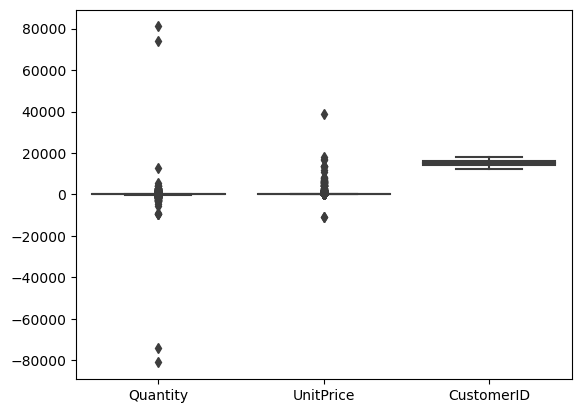

In [40]:
# Finding outliers
sns.boxplot(df)
plt.show

# Bar chart of Monthly Sales

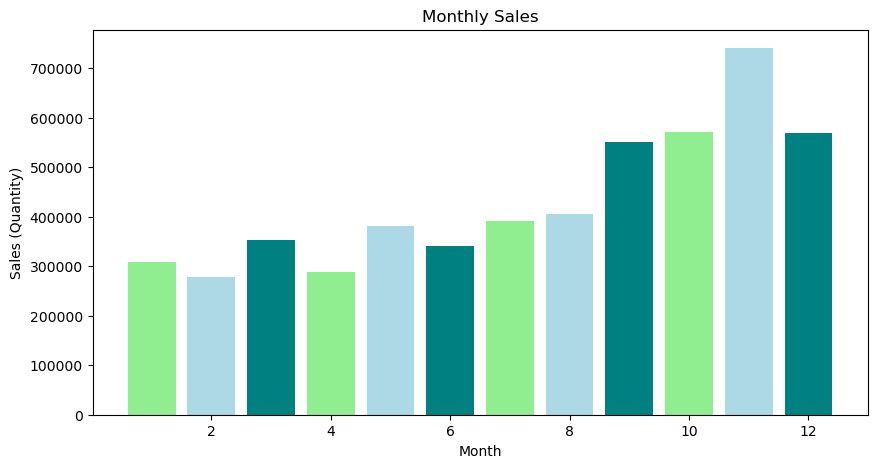

In [43]:
import matplotlib.pyplot as plt

# Ensure 'InvoiceDate' is a datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from the 'InvoiceDate' and create a new column
df['Month'] = df['InvoiceDate'].dt.month

# Group by month and sum 'Quantity' (or 'UnitPrice * Quantity' for total sales)
monthly_sales = df.groupby('Month')['Quantity'].sum()

colors = ['lightgreen', 'lightblue', 'teal']
# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(monthly_sales.index, monthly_sales.values, color = colors)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales (Quantity)')
plt.show()


# Montly Sales Trend

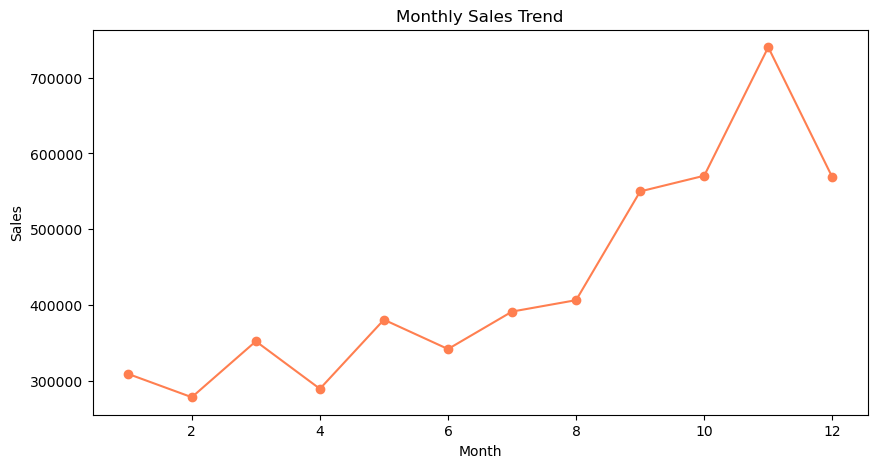

In [46]:
# Line Chart
# Ensure 'InvoiceDate' is a datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from the 'InvoiceDate' and create a new column
df['Month'] = df['InvoiceDate'].dt.month

# Group by month and sum 'Quantity' (or 'UnitPrice * Quantity' for total sales)
monthly_sales = df.groupby('Month')['Quantity'].sum()

colors = ['lightgreen', 'lightblue', 'teal']
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o',color='coral' )
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

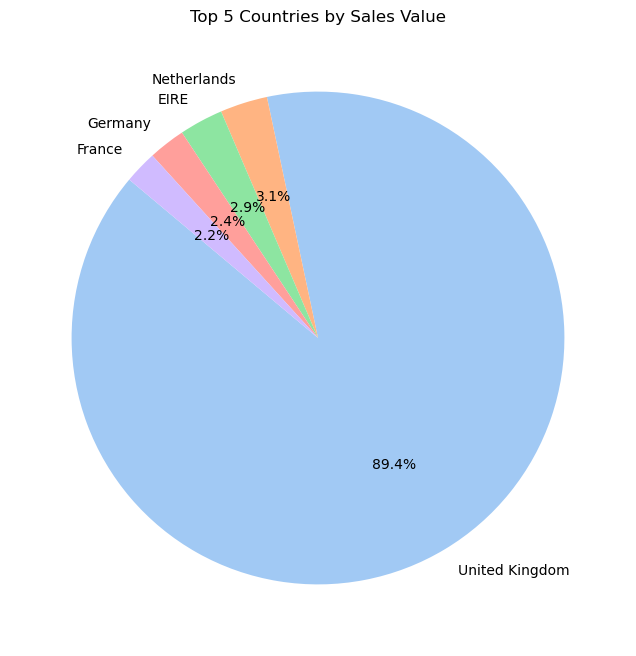

In [48]:
# Ensure 'InvoiceDate' is a datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from the 'InvoiceDate' and create a new column
df['Month'] = df['InvoiceDate'].dt.month

# Group by month and sum 'Quantity' and 'TotalSales'
monthly_sales_quantity = df.groupby('Month')['Quantity'].sum()
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
monthly_sales_value = df.groupby('Month')['TotalSales'].sum()


# Plotting a pie chart of sales by country
country_sales = df.groupby('Country')['TotalSales'].sum().nlargest(5)

plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(country_sales, labels=country_sales.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries by Sales Value')
plt.show()




In [50]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


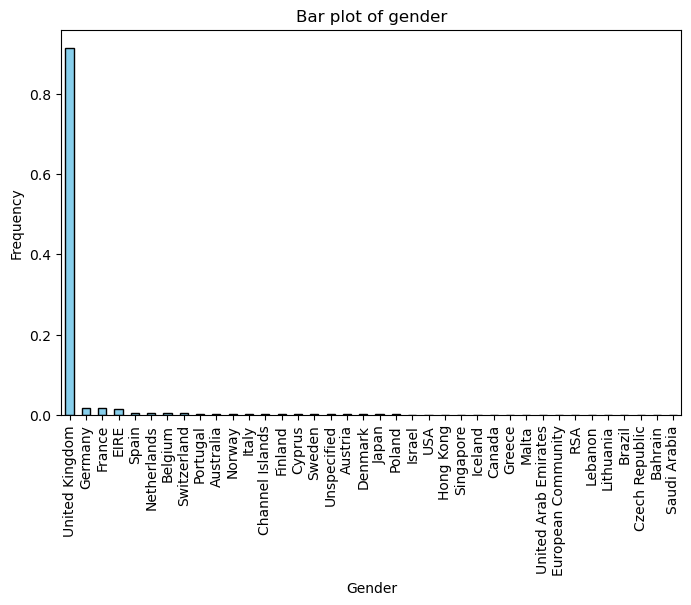

In [91]:
color = ['orange', 'skyblue']
plt.figure(figsize = (8, 5))
df['Country'].value_counts(normalize = True).plot(kind ='bar', color='skyblue', edgecolor='black')
plt.title('Bar plot of gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()